In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Read suicide dataset. Originially from: 
dat = pd.read_csv('https://raw.githubusercontent.com/ndelcamp/IST_718_Project/master/master_dataset.csv?token=AL2SFFMP7MK6TS5BKRJWMRK45FCJS')
display(dat.head())
print(dat.shape)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


(27820, 12)


In [10]:
#Lengths of unique categorical vars. If less than 10 unique levels, print them
for c in dat.select_dtypes(exclude = 'float64').columns:
    u = list(set([v for v in dat[c]]))
    if len(u) < 10:
        print(len(u), 'unique', c, ':', u)
    else:
        print(len(u), 'unique', c)

101 unique country
32 unique year
2 unique sex : ['female', 'male']
6 unique age : ['15-24 years', '55-74 years', '25-34 years', '75+ years', '35-54 years', '5-14 years']
2084 unique suicides_no
25564 unique population
2321 unique country-year
2321 unique  gdp_for_year ($) 
2233 unique gdp_per_capita ($)
6 unique generation : ['Generation X', 'G.I. Generation', 'Boomers', 'Millenials', 'Silent', 'Generation Z']


In [35]:
#How many missing values in each columns?
for c in dat.columns:
    print('missing ' + c + ': ' + str(dat[c].isna().sum()) + '; ' + str(int((dat[c].isna().sum() / len(dat)) * 100)) + '%')
    
#Human Development Index (HDI) is missing for 70% of records.

missing country: 0; 0%
missing year: 0; 0%
missing sex: 0; 0%
missing age: 0; 0%
missing suicides_no: 0; 0%
missing population: 0; 0%
missing suicides/100k pop: 0; 0%
missing country-year: 0; 0%
missing HDI for year: 19456; 69%
missing  gdp_for_year ($) : 0; 0%
missing gdp_per_capita ($): 0; 0%
missing generation: 0; 0%


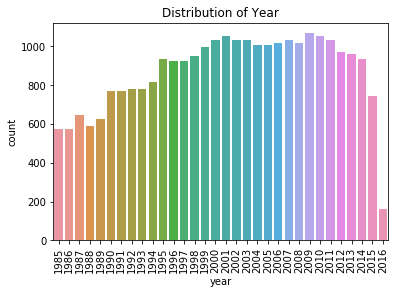

Unique years in dat:  {1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016}


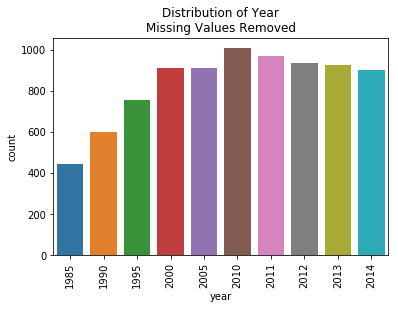

Unique years in dat (missing data removed): {1985, 1990, 1995, 2000, 2005, 2010, 2011, 2012, 2013, 2014}

Years lost if we remove rows where HDI is missing: [1986, 1987, 1988, 1989, 1991, 1992, 1993, 1994, 1996, 1997, 1998, 1999, 2001, 2002, 2003, 2004, 2006, 2007, 2008, 2009, 2015, 2016]


In [58]:
#We should remove column 'HDI for year' whenever a model or other approch cannot use missing data

sns.countplot(dat.year)
plt.xticks(rotation = 90)
plt.title('Distribution of Year')
plt.show()
print('Unique years in dat: ', set(dat.year))

sns.countplot(dat.dropna(axis = 0).year)
plt.xticks(rotation = 90)
plt.title('Distribution of Year\nMissing Values Removed')
plt.show()
print('Unique years in dat (missing data removed):', set(dat.dropna(axis = 0).year))

missingy = [y for y in set(dat.year) if y not in set(dat.dropna(axis = 0).year)]
print('\nYears lost if we remove rows where HDI is missing:', missingy)


In [59]:
dat.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


C:\Users\delc7\Anaconda3\lib\site-packages\numpy\lib\function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\delc7\Anaconda3\lib\site-packages\numpy\lib\function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


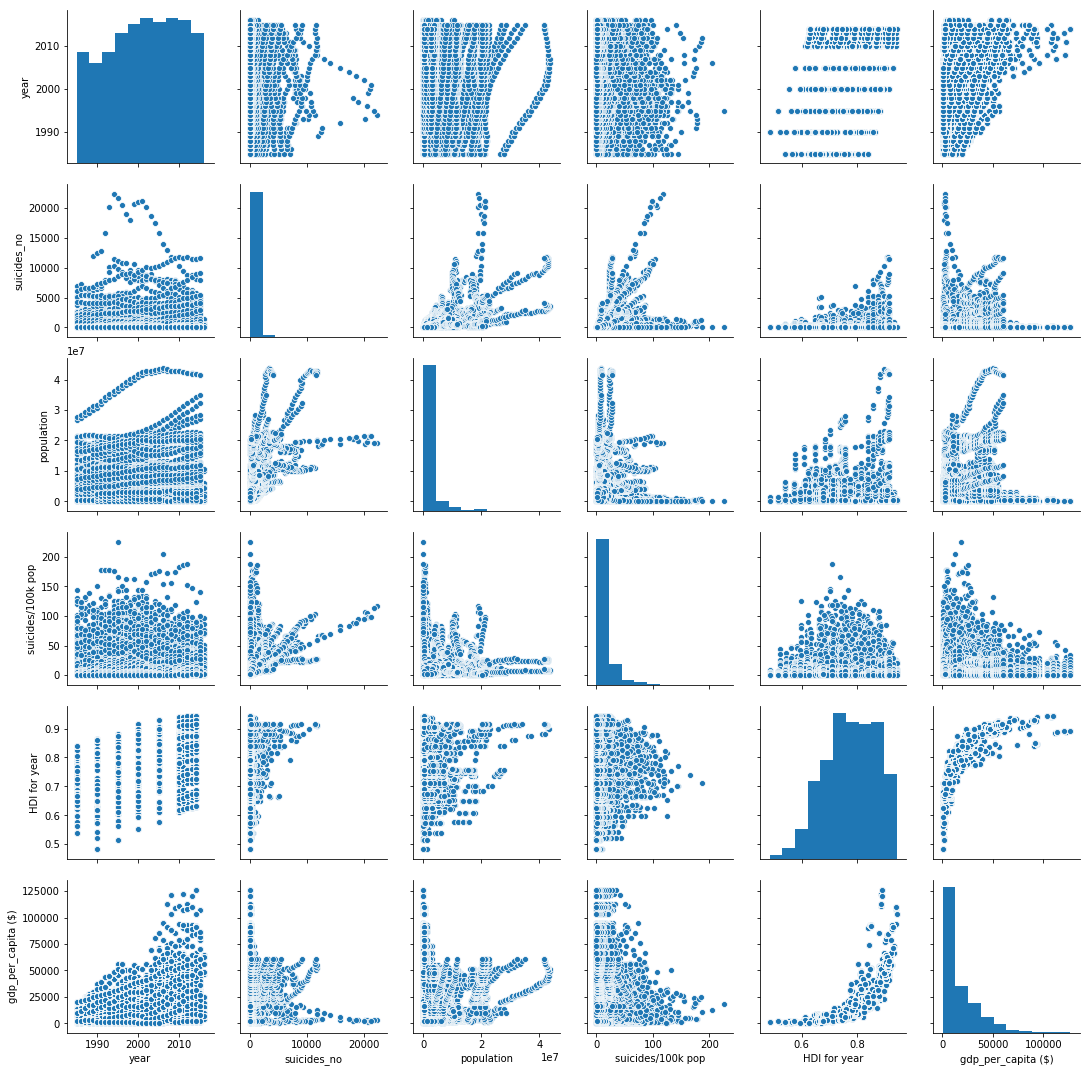

In [60]:
sns.pairplot(dat)